In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [54]:
import warnings
warnings.simplefilter("ignore")

In [55]:
df=pd.read_csv("train.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [56]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [57]:
df.drop(columns=['Booking_ID'],inplace=True)


In [58]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [59]:
df.shape

(29020, 18)

In [60]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [61]:
df.duplicated().sum()

np.int64(7661)

In [62]:
df.drop_duplicates(inplace=True)

In [63]:
df.shape

(21359, 18)

In [64]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [65]:
df["no_of_adults"].value_counts()

no_of_adults
2    15489
1     3996
3     1748
0      113
4       13
Name: count, dtype: int64

In [66]:
cat_cols=['type_of_meal_plan','required_car_parking_space',
       'room_type_reserved','market_segment_type', 'repeated_guest','booking_status']
num_cols=['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

In [67]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [68]:
### DATA ANALYSIS

In [69]:
data=df.copy()

In [70]:
##univariate analysis

In [71]:
def num_plot_dist(df,num_features):
    fig,axes=plt.subplots(len(num_features),2,figsize=(15,len(num_features)*5))

In [72]:
def num_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features) * 5))
    
    if len(num_features) == 1:
        axes = [axes]
    
    for i, column in enumerate(num_features):
        sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette='Blues')
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df, x=column, ax=axes[i][1], palette='Blues')
        axes[i][1].set_title(f"Box Plot for {column}")

    plt.tight_layout()
    plt.show()


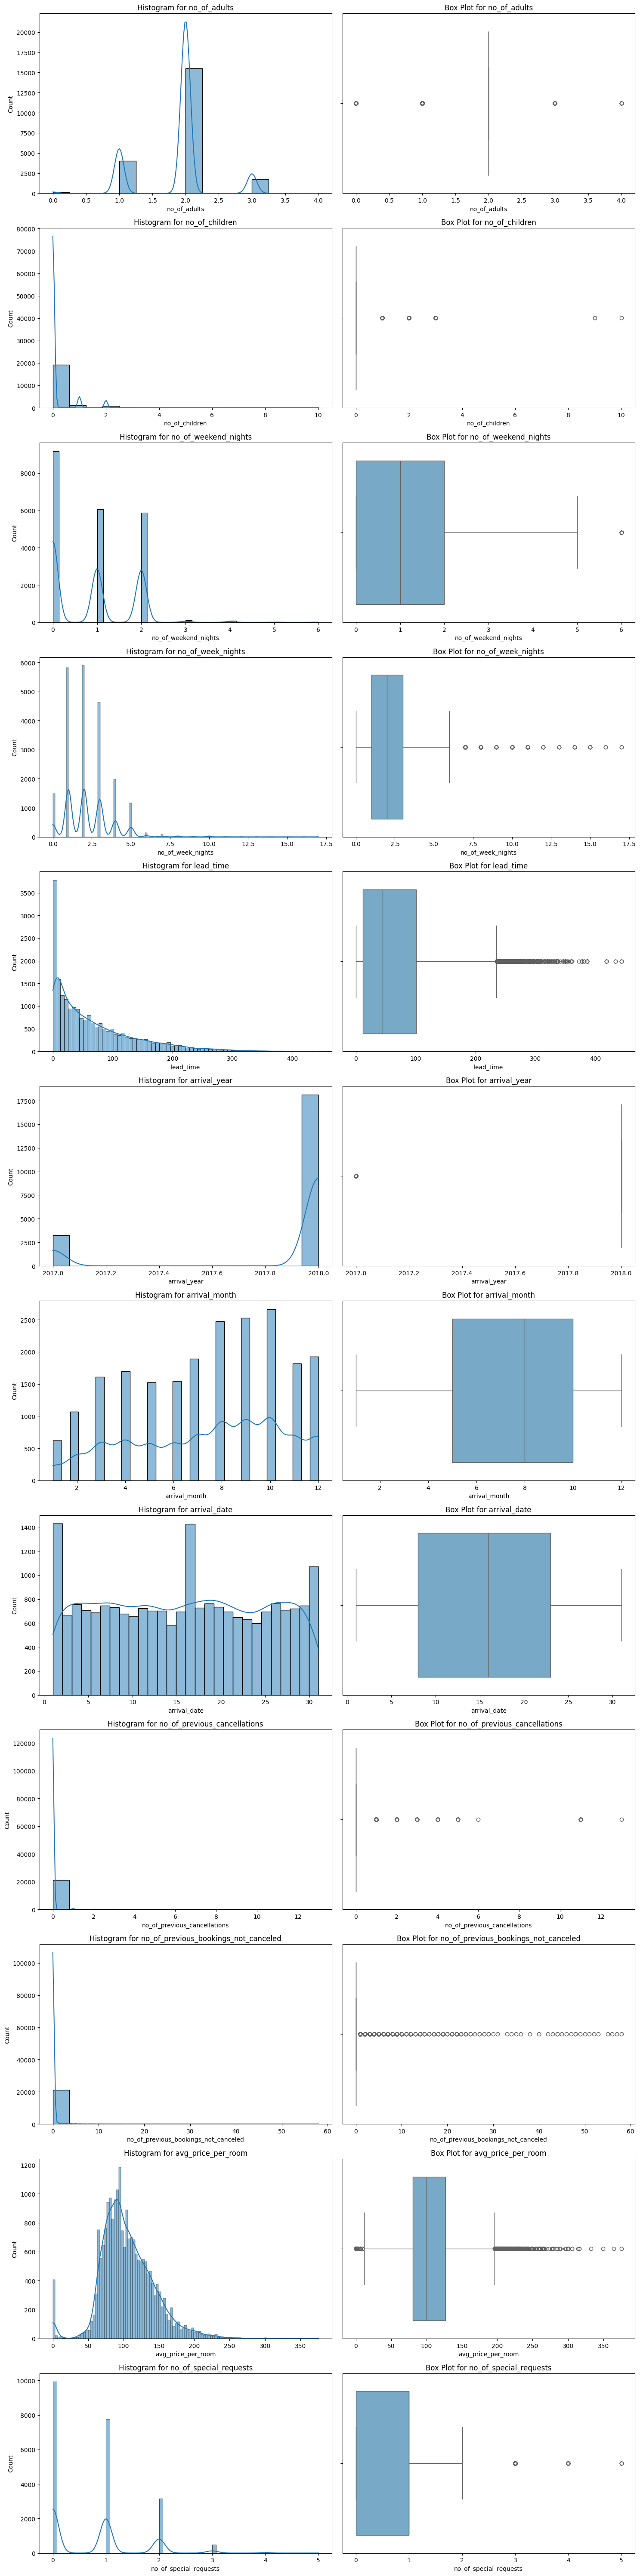

In [73]:
num_plot_dist(data,num_cols)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [75]:
from sklearn.preprocessing import LabelEncoder



In [76]:
label_encoder=LabelEncoder()
mappings={}
for col in cat_cols:
    df[col]=label_encoder.fit_transform(df[col])

    mappings[col]={label:code for label,code in zip(label_encoder.classes_,label_encoder.transform(label_encoder.classes_))}

In [77]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [78]:
##multicollinearity

In [79]:
!pip install statsmodels


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [81]:
X = add_constant(df)
vif_data=pd.DataFrame()
vif_data["feature"]=X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]

In [82]:
vif_data

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


In [83]:
##our data has no multicollinearity-positve new

In [84]:
corr=df.corr()

In [85]:
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.049738,0.092764,0.114218,-0.005977,0.000419,0.275089,0.150995,0.096366,0.004833,0.018382,0.310783,-0.238974,-0.063739,-0.143903,0.327749,0.156833,-0.097198
no_of_children,-0.049738,1.000000,0.011033,0.019408,-0.102631,0.018089,0.351786,0.010094,0.036248,0.002606,0.027934,0.103359,-0.048678,-0.020954,-0.029112,0.352640,0.099069,-0.060030
no_of_weekend_nights,0.092764,0.011033,1.000000,0.223154,-0.041123,-0.057417,0.029964,0.131240,0.029016,0.011300,0.006921,0.091510,-0.088633,-0.028935,-0.040008,-0.003579,0.013803,-0.067944
no_of_week_nights,0.114218,0.019408,0.223154,1.000000,-0.073247,-0.061798,0.085547,0.223953,0.022199,0.030029,-0.000633,0.116978,-0.115186,-0.033133,-0.051829,0.018420,0.032304,-0.124415
type_of_meal_plan,-0.005977,-0.102631,-0.041123,-0.073247,1.000000,-0.024666,-0.245616,-0.055124,0.094627,0.008576,-0.006094,0.184654,-0.075476,-0.017205,-0.044891,-0.100708,-0.011933,-0.035864
required_car_parking_space,0.000419,0.018089,-0.057417,-0.061798,-0.024666,1.000000,0.016335,-0.046767,0.010158,-0.015330,-0.009352,-0.039210,0.113582,0.026876,0.066665,0.055536,0.075479,0.092511
room_type_reserved,0.275089,0.351786,0.029964,0.085547,-0.245616,0.016335,1.000000,-0.014666,0.090492,0.001906,0.024315,0.089176,-0.045353,-0.013842,-0.024727,0.490983,0.086319,-0.072128
lead_time,0.150995,0.010094,0.131240,0.223953,-0.055124,-0.046767,-0.014666,1.000000,0.169463,0.132140,0.034112,0.140396,-0.148948,-0.053930,-0.087026,-0.044061,-0.012787,-0.368151
arrival_year,0.096366,0.036248,0.029016,0.022199,0.094627,0.010158,0.090492,0.169463,1.000000,-0.322786,0.011340,0.111445,-0.010158,0.011111,0.025551,0.174569,0.000594,-0.149673
arrival_month,0.004833,0.002606,0.011300,0.030029,0.008576,-0.015330,0.001906,0.132140,-0.322786,1.000000,-0.020386,-0.017885,0.001744,-0.043586,-0.003881,0.066156,0.136037,0.015898


<Axes: >

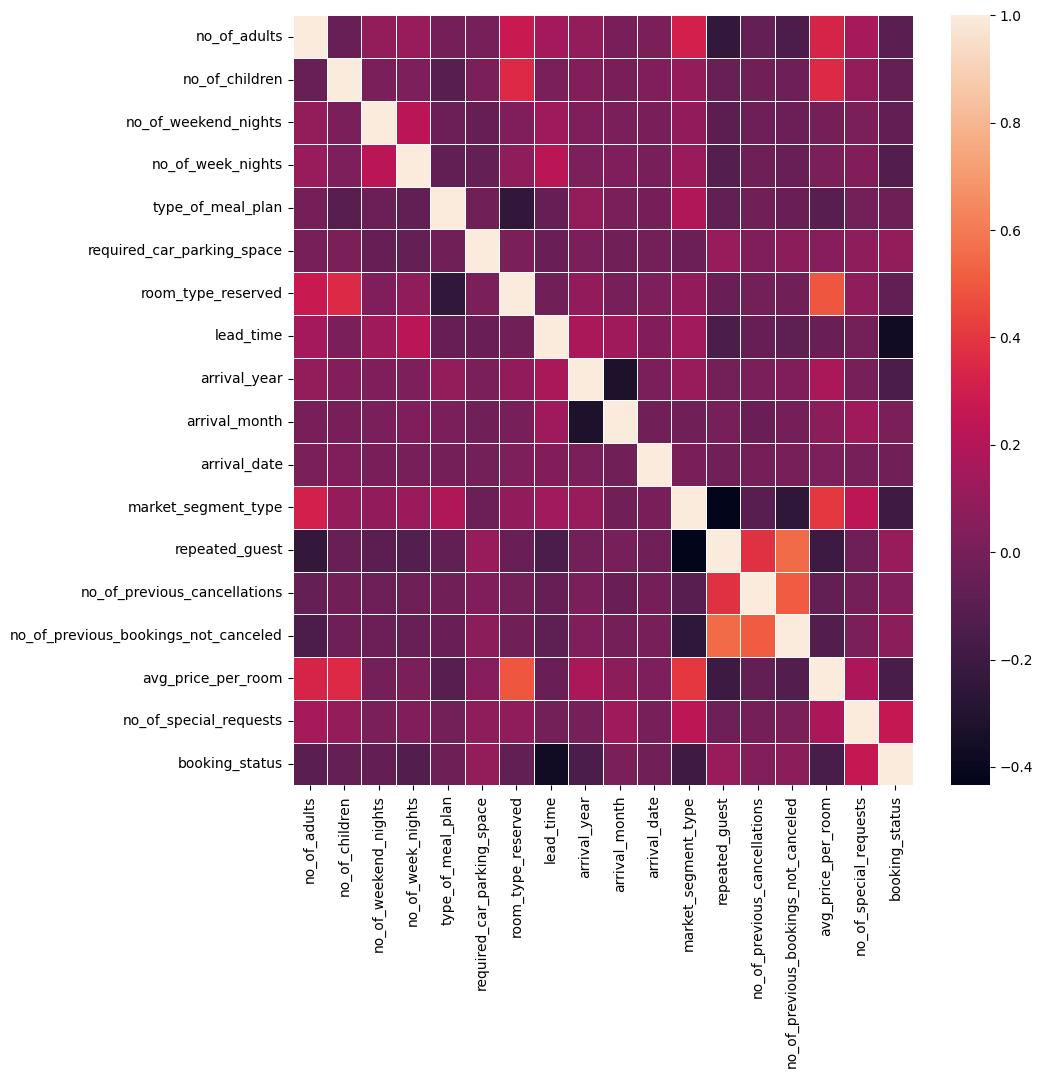

In [86]:
plt.figure(figsize=(10,10))
sns.heatmap(corr ,linewidths=0.5)

In [87]:
skewness=df.skew()

In [88]:
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [89]:
for col in df.columns:
    if skewness[col] > 5:
        df[col]= np.log1p(df[col])

In [90]:
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [92]:
import numpy as np
import pandas as pd

# Step 1: Calculate skewness for all numeric columns
skew_vals = df.skew()

# Step 2: Set the skewness threshold
threshold = 5

# Step 3: Identify highly skewed numeric columns
high_skew_cols = skew_vals[abs(skew_vals) > threshold].index

# Step 4: Apply log1p transform safely
for col in high_skew_cols:
    # Only apply to numeric columns with more than 2 unique values
    if df[col].nunique() > 2 and np.issubdtype(df[col].dtype, np.number):
        df[col] = np.log1p(df[col])

# Step 5 (Optional): Check skewness again to verify improvement
print("Skewness after correction:")
print(df[high_skew_cols].skew())


Skewness after correction:
repeated_guest                           5.282330
no_of_previous_cancellations            11.240884
no_of_previous_bookings_not_canceled     6.427598
dtype: float64


In [93]:
df.skew()

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            11.240884
no_of_previous_bookings_not_canceled     6.427598
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [94]:
df["booking_status"].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [95]:
X=df.drop(columns='booking_status')
y=df['booking_status']

In [96]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [97]:
y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [98]:
from imblearn.over_sampling import SMOTE

In [99]:
smote=SMOTE(random_state=42)
X_res,y_res=smote.fit_resample(X,y)

In [100]:
y_res

0        1
1        1
2        0
3        1
4        0
        ..
30457    0
30458    0
30459    0
30460    0
30461    0
Name: booking_status, Length: 30462, dtype: int64

In [101]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [102]:
df.shape

(21359, 18)

In [103]:
balanced_df=pd.DataFrame(X_res,columns=X.columns)
balanced_df["booking_status"]=y_res

In [104]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [105]:
balanced_df.shape

(30462, 18)

In [106]:
df=balanced_df.copy()

In [107]:
df.shape

(30462, 18)

In [108]:
###feature selection

In [109]:
len(df.columns)

18

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
X=df.drop(columns='booking_status')
y=df['booking_status']

In [112]:
model=RandomForestClassifier(random_state=42)
model.fit(X,y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [118]:
feature_importance=model.feature_importances_

In [119]:
feature_importance_df=pd.DataFrame({'feature': X.columns, "importance" : feature_importance})

In [120]:
top_features_importance_df=feature_importance_df.sort_values(by="importance", ascending=False)

In [117]:
len(df.columns)

18

In [123]:
top_10_features=top_features_importance_df["feature"].head(10).values
top_10_df=df[top_10_features.tolist() + ["booking_status"] ]

In [124]:
top_10_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,0,161.00,10,17,4,1,2,0,0,1
1,98,2,121.50,7,16,4,1,1,0,0,1
2,433,0,70.00,9,8,3,3,0,0,0,0
3,195,0,72.25,8,8,3,5,2,0,0,1
4,188,0,130.00,6,15,3,2,0,0,0,0


In [125]:
len(top_10_df.columns)

11

In [126]:
df=top_10_df.copy()

In [ ]:
##model selection which model best or most effective for out dtaset

In [131]:
!pip install xgboost lightgbm


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [133]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score


In [134]:
X=df.drop(columns='booking_status')
y=df['booking_status']

In [135]:
X_train,X_test ,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [136]:
#start initializing all classifirs##
classifiers={"random forest":RandomForestClassifier(random_state=42),"Logistic Regression": LogisticRegression(random_state=42),"gradient boosting": GradientBoostingClassifier(random_state=42), "support vector clasifeir": SVC(random_state=42),"decision tree": DecisionTreeClassifier(random_state=42),"knn": KNeighborsClassifier(),"naive bayes": GaussianNB(), "xgboost": XGBClassifier(random_state=42),"adaboost":AdaBoostClassifier(random_state=42),"lgbm": LGBMClassifier(random_state=42)}

In [156]:
metrics = {
    "Model": [],
    "accuracy": [],
    "precision": [],
    "recall": [],
    "f1score": []
}


In [157]:
for model_name,classifier in classifiers.items():
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    accuracy=accuracy_score(y_test,y_pred)
    precison=precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    
    metrics["Model"].append(model_name)
    metrics["accuracy"].append(accuracy)
    metrics["precision"].append(precison)
    metrics["recall"].append(recall)
    metrics["f1score"].append(f1)

[LightGBM] [Info] Number of positive: 12161, number of negative: 12208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000975 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499036 -> initscore=-0.003857
[LightGBM] [Info] Start training from score -0.003857


In [155]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # Debug
    print(f"{model_name}: unique preds = {set(y_pred)}")

    # Compute metrics safely
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    metrics["Model"].append(model_name)
    metrics["accuracy"].append(accuracy)
    metrics["precision"].append(precision)
    metrics["recall"].append(recall)
    metrics["f1score"].append(f1)


random forest: unique preds = {np.int64(0), np.int64(1)}
Logistic Regression: unique preds = {np.int64(0), np.int64(1)}
gradient boosting: unique preds = {np.int64(0), np.int64(1)}
support vector clasifeir: unique preds = {np.int64(0), np.int64(1)}
decision tree: unique preds = {np.int64(0), np.int64(1)}
knn: unique preds = {np.int64(0), np.int64(1)}
naive bayes: unique preds = {np.int64(0), np.int64(1)}
xgboost: unique preds = {np.int64(0), np.int64(1)}
adaboost: unique preds = {np.int64(0), np.int64(1)}
[LightGBM] [Info] Number of positive: 12161, number of negative: 12208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499036 -> initsc

In [160]:
metrics_df=pd.DataFrame(metrics)

In [159]:
for k, v in metrics.items():
    print(k, len(v) if hasattr(v, "__len__") else v)


Model 10
accuracy 10
precision 10
recall 10
f1score 10


In [161]:
metrics_df

,Model,accuracy,precision,recall,f1score
0,random forest,0.889217,0.889938,0.890228,0.890083
1,Logistic Regression,0.776137,0.805954,0.731922,0.767156
2,gradient boosting,0.837026,0.819637,0.867427,0.842855
3,support vector clasifeir,0.720171,0.729412,0.706840,0.717949
4,decision tree,0.841622,0.852360,0.829316,0.840680
5,knn,0.779255,0.856258,0.675244,0.755054
6,naive bayes,0.773346,0.803232,0.728664,0.764133
7,xgboost,0.873133,0.866114,0.885016,0.875463
8,adaboost,0.804202,0.800705,0.814007,0.807301
9,lgbm,0.865419,0.850905,0.888599,0.869344


In [ ]:
####trin our random forest model

In [ ]:
##do hyperm=parametr tuning

In [166]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [162]:
X=df.drop(columns='booking_status')
y=df['booking_status']


In [163]:
X_train,X_test ,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [164]:
rf=RandomForestClassifier(random_state=42)

In [175]:
params_dist={
    'n_estimators':randint(100,500),
    'max_depth':randint(10,50),
    'min_samples_split':randint(2,10),
    'min_samples_leaf':randint(1,5) ,
    'bootstrap': [True, False]

}

In [176]:
random_search=RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

In [177]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.7s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.8s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.9s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.8s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.7s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   6.8s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   6.8s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   8.1s
[CV]

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': <scipy.stats....t 0x13b7f58d0>, 'min_samples_leaf': <scipy.stats....t 0x13b8848e0>, 'min_samples_split': <scipy.stats....t 0x13b884880>, ...}"
,n_iter,5
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [179]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [180]:
best_rf_model=random_search.best_estimator_

In [181]:
y_pred=best_rf_model.predict(X_test)

In [182]:
accuracy=accuracy_score(y_test,y_pred)
precison=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

In [183]:
accuracy

0.8910224848186443

In [184]:
precision

0.8509045539613225

In [185]:
recall

0.8947882736156352

In [186]:
f1

0.8921727833712244

In [187]:
####saving this model use joblib librabry

In [188]:
import joblib

In [189]:
joblib.dump(best_rf_model,"random_forest.pkl")

['random_forest.pkl']

In [202]:
loaded_model=joblib.load("random_forest.pkl")


In [203]:
X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
4157,190,1,93.5,9,8,4,5,2,0,0


In [206]:
new_data = np.array([4157, 190, 1, 93.5, 9, 8, 4, 5, 2, 0]).reshape(1, -1)


In [207]:
predictions=loaded_model.predict(new_data)

In [209]:
predictions

array([1])

In [211]:
### always prefer a model which return a file of smaller size . here random f gives a file of 176 mb , xg boost also does similar#####
##but lightgbm model is said to give a file(size of model) of 4mb only. in production maps we ll be charged for each mb of the file# ,also prediction will be slow cause of huge size. so in src folder we ll use light gbm during mlops flder in actual model training #